# Titanic Data Analysis

### Importing the necessay modules

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Exploring the dataset

In [89]:
df=pd.read_csv('D:/DataAnalysis/Python/SupervisedLearning/Titanic-Data-Analysis-master/dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [90]:
len(df)

891

In [91]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [92]:
df['Age'].max(),df['Age'].min()

(80.0, 0.42)

In [93]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [94]:
df['Survived'].value_counts() * 100/len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [95]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [96]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Data Visualization

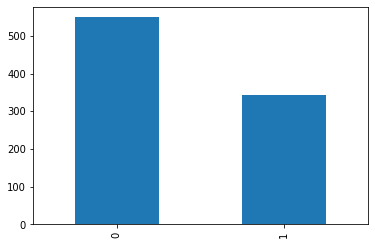

In [97]:
df['Survived'].value_counts().plot(kind='bar')

#### As can be seen, the distribution of the passengers according to not surviving and surviving is in the ratio of 60 to 40 respectively 

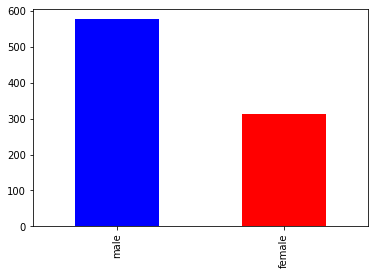

In [98]:
df['Sex'].value_counts().plot(kind='bar', color=['b','r'])

#### Most of the passenger aboard were Male

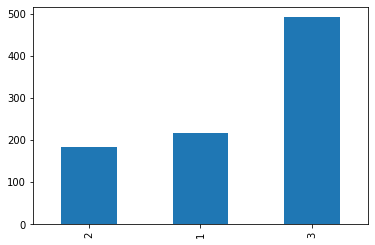

In [99]:
df['Pclass'].value_counts().sort_values().plot(kind='bar')

#### Most of the passengers in the ship were in 3rd Passenger Class followed by 1st and then 2nd

#### Is there a relation between Age of the passengers and survivability?

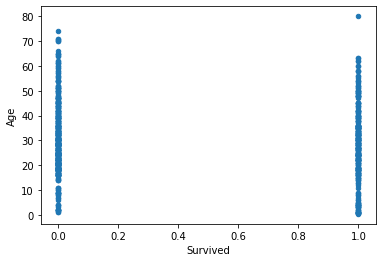

In [100]:
df.plot(kind='scatter',x='Survived' ,y='Age')

#### The distribution looks similar, Survived on the right side and not survived on the left, we can see there are passengers of all kinds of age

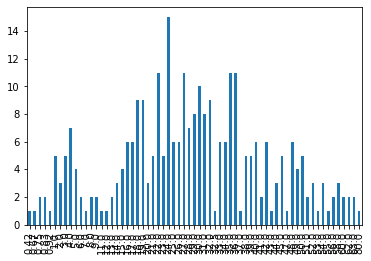

In [101]:
df[df['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar')

#### We have huge number of values representing different ages, so Binning these values of ages to understand the relation better

In [102]:
bins=[0,10,20,30,40,50,60,70,80]
df['AgeBin']=pd.cut(df['Age'],bins)

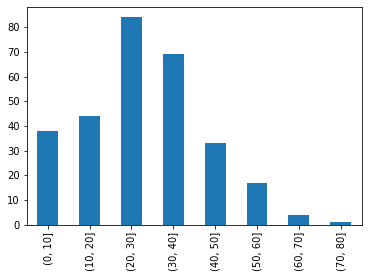

In [103]:
df[df['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

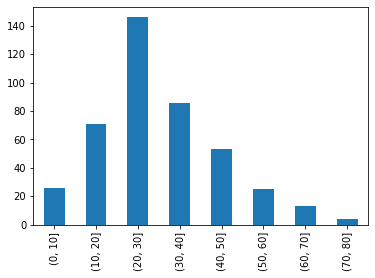

In [104]:
df[df['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

#### As is evident, the plot for Age is same in both the cases of survived and not survived and hence Age factor doesn't tell much about Survival of the passengers

#### Is there a relation between Passenger Class(Pclass) and survivability of the passengers?

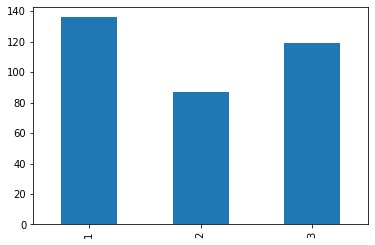

In [105]:
df[df['Survived']==1]['Pclass'].value_counts().sort_index().plot(kind='bar')

#### Passengers in the first class had better luck for surviving as compared to passengers in second and third class

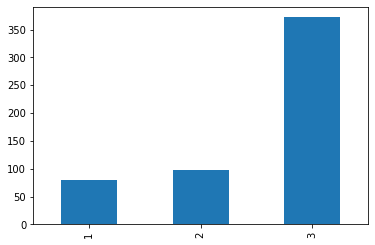

In [106]:
df[df['Survived']==0]['Pclass'].value_counts().sort_index().plot(kind='bar')

#### Majority of the Passengers in the third Class did not survive  

#### Is there a relation between Gender and survivability of the passengers?

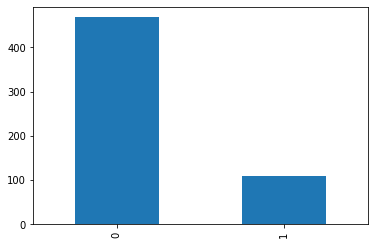

In [107]:
df[df['Sex']=='male']['Survived'].value_counts().plot(kind='bar')

#### Majority of the Male Passengers did not survived

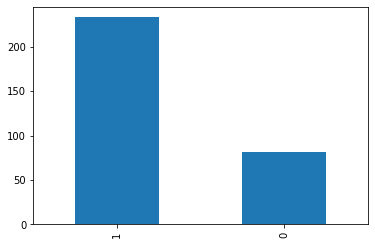

In [108]:
df[df['Sex']=='female']['Survived'].value_counts().plot(kind='bar')

#### On the other hand, majority of the Female Passengers did survived

##### It is clear indication that Passenger class and Gender did play role for Survivability of Passengers.

#### So, lets find relation between Passenger Class vs Gender vs survivability of the passengers?

##### lets start with Male passengers

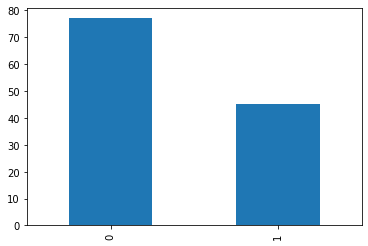

In [109]:
df[ (df['Sex']=='male')  &  (df['Pclass']==1) ]['Survived'].value_counts().plot(kind='bar')

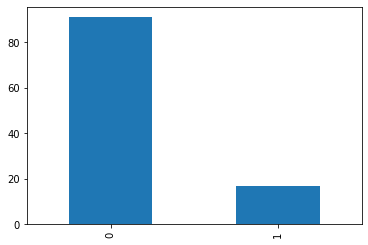

In [110]:
df[ (df['Sex']=='male')  &  (df['Pclass']==2) ]['Survived'].value_counts().plot(kind='bar')

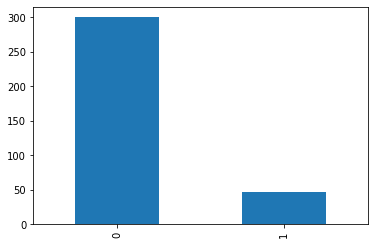

In [111]:
df[ (df['Sex']=='male')  &  (df['Pclass']==3) ]['Survived'].value_counts().plot(kind='bar')

#### It can be seen that majority of the male passengers in the first, second and third class did not survived

##### Next Female passengers

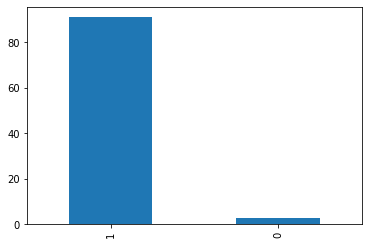

In [112]:
df[ (df['Sex']=='female')  &  (df['Pclass']==1) ]['Survived'].value_counts().plot(kind='bar')

#### It is clear, almost all the female passengers did survived in first class

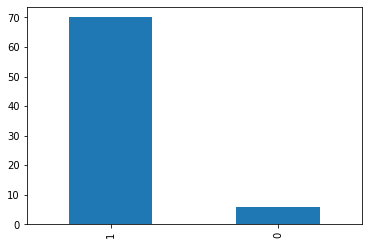

In [113]:
df[ (df['Sex']=='female')  &  (df['Pclass']==2) ]['Survived'].value_counts().plot(kind='bar')

#### Most of the female passengers did survived in second class, but survivability of female passengers in the first class is high as compared to the female passengers in second class 

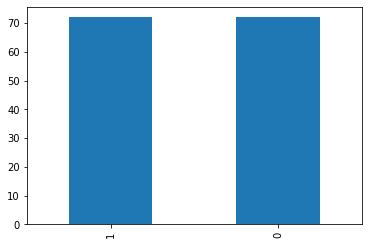

In [114]:
df[ (df['Sex']=='female')  &  (df['Pclass']==3) ]['Survived'].value_counts().plot(kind='bar')

#### The distibution of the female passengers in the third class is 50-50

# Conclusion : 

#### 1) Age did not played a big role in finding the survivability of titanic passengers

#### 2)Pclass and Gender did played crucial role to find survivability of the titanic passengers

#### 3)Being a female passenger in first class is a strong indication of survival.

## Machine Learning

#### Lets start by keeping only the significant features by dropping few features that are not significant

In [115]:
df.drop(columns = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','AgeBin'] , axis='columns', inplace=True)

In [116]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [117]:
target = df['Survived']
features = df.drop(columns=['Survived'] , axis ='columns')

#### Converting categorical text variables to numerical variables

In [120]:
#Method 1: 
#dummies = pd.get_dummies(df['Sex'])
# df = pd.concat([df,dummies], axis = 'columns')
# df.drop(columns = ['Sex'], axis='columns', inplace = True])

# Method 2:
features = pd.get_dummies(features, columns = ['Sex'], drop_first=True)

In [121]:
features.head()

,Pclass,Age,Fare,Sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


#### Checking for null values

In [122]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass      891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
Sex_male    891 non-null uint8
dtypes: float64(2), int64(1), uint8(1)
memory usage: 21.9 KB


In [123]:
features.columns[features.isna().any()]

Index(['Age'], dtype='object')

In [124]:
features['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [125]:
features['Age'] = features['Age'].fillna(features['Age'].mean())

In [126]:
features.head(10)

,Pclass,Age,Fare,Sex_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
5,3,29.699118,8.4583,1
6,1,54.000000,51.8625,1
7,3,2.000000,21.0750,1
8,3,27.000000,11.1333,0
9,2,14.000000,30.0708,0


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=42)

In [188]:
len(features)

891

In [189]:
len(X_train)

712

In [190]:
len(X_test)

179

In [191]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [192]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [193]:
model.score(X_test, y_test)

0.8156424581005587

In [204]:
y_predicted = model.predict(X_test)
y_predicted 

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [205]:
model.predict_proba(X_test[:10])

array([[0.96286753, 0.03713247],
       [0.62909736, 0.37090264],
       [0.92521835, 0.07478165],
       [0.29637242, 0.70362758],
       [0.40477446, 0.59522554],
       [0.75178769, 0.24821231],
       [0.48533848, 0.51466152],
       [0.94089294, 0.05910706],
       [0.07017637, 0.92982363],
       [0.4838766 , 0.5161234 ]])

### Confusion Matrix

Text(24.0, 0.5, 'Actual')

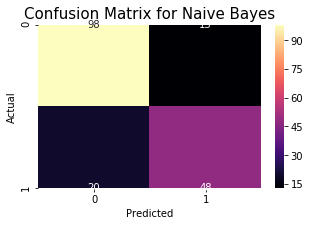

In [216]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True, cmap = 'magma').set_title('Confusion Matrix for Naive Bayes', color='black', size = '15')
plt.xlabel('Predicted')
plt.ylabel('Actual')